### - Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

    Una variable categòrica (UniqueCarrier)
    Una variable numèrica (ArrDelay)
    Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    Dues variables numèriques (ArrDelay i DepDelay)
    Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
import seaborn as sns
from scipy import stats


sns.set()
#Importo el dataset guardat del anterior sprint
df = pd.read_pickle("./Data_Vols.pkl") 

df['ArrDelay'].describe()

count    1.928371e+06
mean     4.219988e+01
std      5.678472e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

### VARIABLE CATEGORICA(uniqueCarrier)


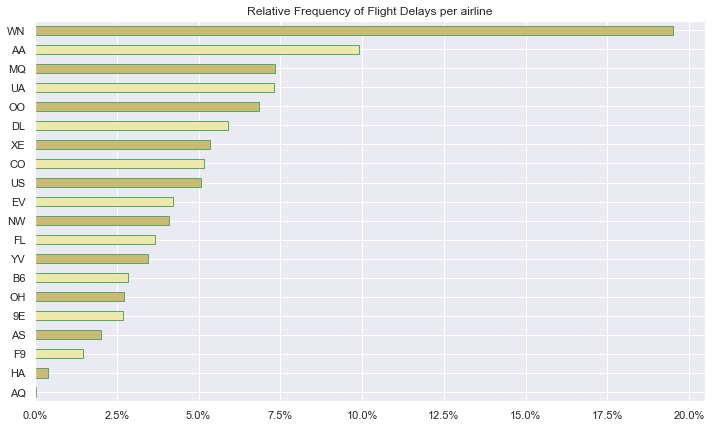

In [5]:
plt.get_cmap('Spectral')
plt.figure(figsize=(12,7))
carrier_sorted = df['UniqueCarrier'].value_counts(normalize=True).mul(100).sort_values(ascending=True)
p = carrier_sorted.plot(kind='barh',
                       color = ['palegoldenrod', 'y'],
                       edgecolor='g')

#FORMATEJO ELS TICKS A PERCENTS
p.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('Relative Frequency of Flight Delays per airline')
plt.savefig('./Carriers_percent.png')
plt.show(p)

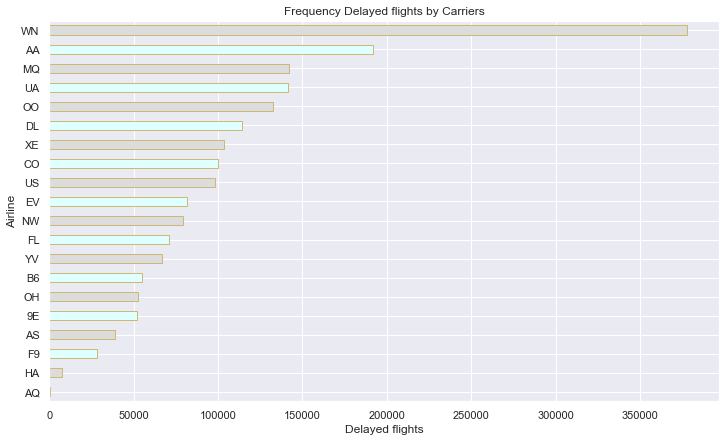

In [11]:
#plot aerolinies amb mes retards acumulats *(num de vols)
plt.figure(figsize = (12,7))
carrier_sorted = df['UniqueCarrier'].value_counts().sort_values(ascending=True)
p = carrier_sorted.plot(kind='barh',
                        color= ['lightcyan', 'gainsboro'], 
                        edgecolor='y')
plt.title("Frequency Delayed flights by Carriers")
plt.xlabel("Delayed flights")
plt.ylabel("Airline")
plt.savefig('./Carriers_int.png')
plt.show(p) 


### VARIABLE  NUMERICA (ArrDelay)

In [ ]:
#POC A DIR SI EL 75% ESTA PER SOTA DE 56 MIN, EL MODO SON 10 minuts I EL MAX 2500 minuts
#AL TENIR TANTS TEMPS SIMILARS, CREO UNA COLUMNA NOVA QUE AGRUPI CATEGORICAMENT ELS RETARDS EN 
#GRUPS TEMPORALS CUSTOM PER PODER FILAR MES PRIM I OBTENIR UNA INFO MES CLARA I ENTENEDORA.

df['ArrDelay'] = np.where(df['ArrDelay'] < 0, 0, df['ArrDelay'])

# create a list of our conditions, timeframes in this case
conditions = [
    (df['ArrDelay'] >= 0) & (df['ArrDelay'] <= 5),
    (df['ArrDelay'] > 5) & (df['ArrDelay'] <= 10),
    (df['ArrDelay'] > 10) & (df['ArrDelay'] <= 15),
    (df['ArrDelay'] > 15) & (df['ArrDelay'] <= 30),
    (df['ArrDelay'] > 30) & (df['ArrDelay'] <= 60),
    (df['ArrDelay'] > 60) & (df['ArrDelay'] <= 120),
    (df['ArrDelay'] > 120) & (df['ArrDelay'] <= 180),
    (df['ArrDelay'] > 180)
    ]

# create a list of the values we want to assign for each condition
values = ['0-5min', '5-10min', '10-15min',
          '15-30min', '30-60min', 
          '1-2hrs', '2-3hrs', '+3hrs']
#define dicctionary mapping colors with values
colors = {'g':'0-5min',
          'g':'5-10min',
          'y':'10-15min',
          'y':'15-30min',
          'y':'30-60min', 
          'r':'1-2hrs',
          'r':'2-3hrs',
          'k':'+3hrs'}
# create a new column and use np.select to assign values to it using our lists as arguments
df['Arr_delay_timeframes'] = np.select(conditions, values)
print(df[['Arr_delay_timeframes']].head())

print(df.head())
# display updated DataFrame
plt.figure(figsize=(12,7))
fig, ax = plt.subplots()
plot = df['Arr_delay_timeframes'].value_counts(normalize=True).mul(100).plot(kind='barh', edgecolor='C3')  
plot.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.title("Frequency of Delayed Arrivals by timeframes")
plt.xlabel("Percentage of Total Delayed Arrivals")
plt.ylabel("Timeframe")
plt.savefig('./Arrival_Delays_Timeframes_percentage.png')
plt.show(plot)


### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

In [ ]:
#BOXPLOT DE ARRDELAY SEGONS AEROLINIA

g= sns.catplot(x="ArrDelay",
               y="UniqueCarrier",
               data=df,
               kind="box"
              )
g.fig.set_size_inches(27,12)
plt.title('ArrDelay UniqueCarrier BoxPlot')
plt.savefig('./ArrDelay_UniqueCarrier_BoxPlot.png')
plt.show()

### Dues variables numèriques (ArrDelay i DepDelay)

In [ ]:
#MIRO AVIAM COM QUEDA UN SCATTERPLOT , PERO TAMPOC SEMBLA QUE 
#PUGUI APORTAR INFORMACIO MOLT DETALLADA PER MOLT QUE L'AMPLII, OVERPLOTTED!!!! 
#DE TOTES MANERES S'APRECIA UNA... ¿CORRELACIÓ POSITIVA?

p = sns.lmplot(data=df,
               x="ArrDelay",
               y="DepDelay", 
               scatter_kws={'color':'lawngreen','s':0.2} ,
               line_kws={"color":"indigo","alpha":0.3,"lw":1.2}
              )
p.fig.set_size_inches(27,12)
plt.title('Arrival Vs Departure')
plt.savefig('./Arrival_vs_Departure_01.png')
plt.show(p)

In [ ]:
f = sns.displot(data=df,
                x="ArrDelay",
                y="DepDelay",
                kind="kde",
                color='C4',
                height = 5,
                aspect = 2,
                cbar=True)

plt.xlim(-150,1500)
plt.ylim(-50,1500)
plt.title('Arrival Vs Departure')
plt.savefig('./Arrival_vs_Departure_02.png')
plt.show(f)

In [ ]:
#ZOOM DETALL DEL PLOT EN HEXGRID
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.jointplot(x=df["ArrDelay"],
              y=df["DepDelay"],
              gridsize=400,
              edgecolor='C1',
              color='C9',
              kind='hex')
plt.xlim(0,120)
plt.ylim(0,120)
plt.savefig('./Zoom_hex.png')
plt.show()

### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

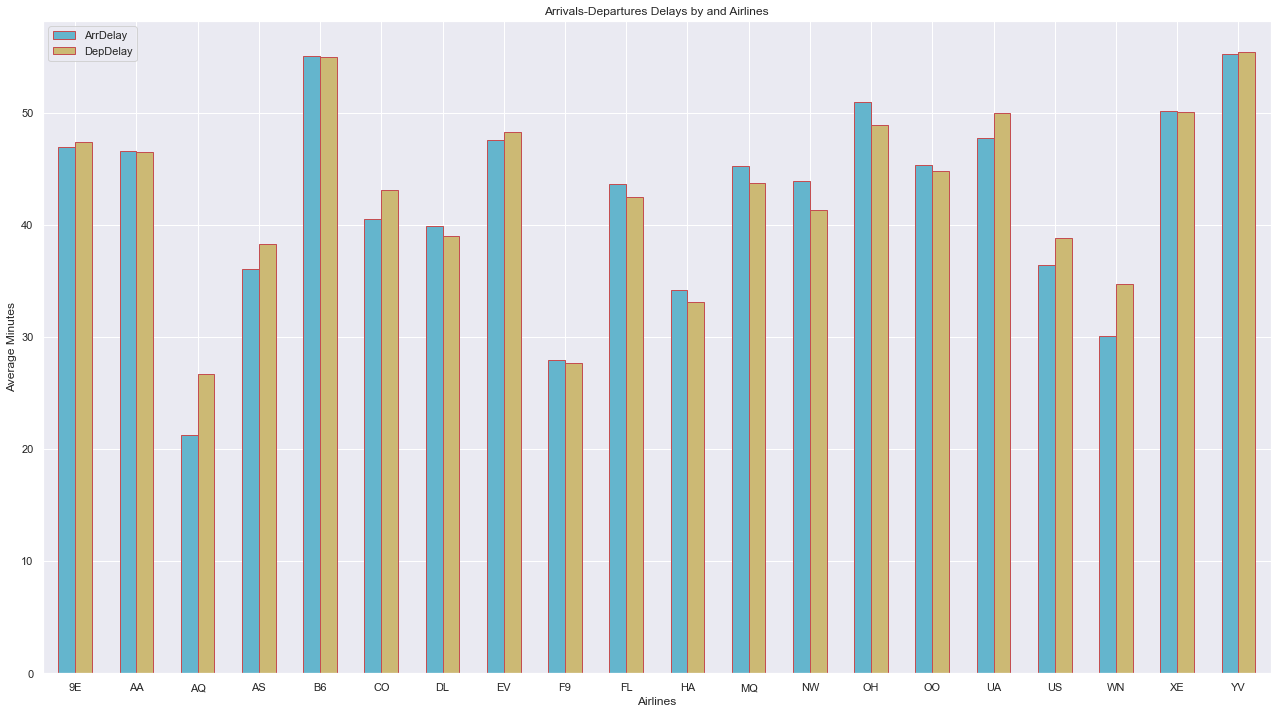

In [13]:
#AQUI VULL REFLEXAR EL ARRDELAY I DEPDELAY AMB HUE , VISUALITZENT D'UNA MANERA CLARA ELS VALORS PER AEROLINIA
# I PER AIXÒ HAURÉ DE TREBALLAR AMB LA MITJANA DE CADA VARIABLE NUMERICA EN FUNCIO DE LA CATEGORICA, JA QUE
#SINÓ TINDRIA UNA BARRA PER CADA VOL(2MILIONS? NO F***ING WAY)

#VULL LA MEDIA DE CADA MOSTRA EN FUNCIO DE L'AEROLINIA
grouped = df[['UniqueCarrier', 'ArrDelay', 'DepDelay']].groupby('UniqueCarrier').agg('mean')
p = grouped.plot(kind='bar',
                 color=['C9','C8'],
                 edgecolor='C3',
                 width=0.55, 
                 stacked=False, 
                 figsize=(22,12)
                )
plt.xlabel('Airlines')
plt.xticks(rotation=0)
plt.ylabel('Average Minutes')
plt.title('Arrivals-Departures Delays by and Airlines')
plt.savefig('./Arrivals_Departure_by_Airlines.png')
plt.show(p)

### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

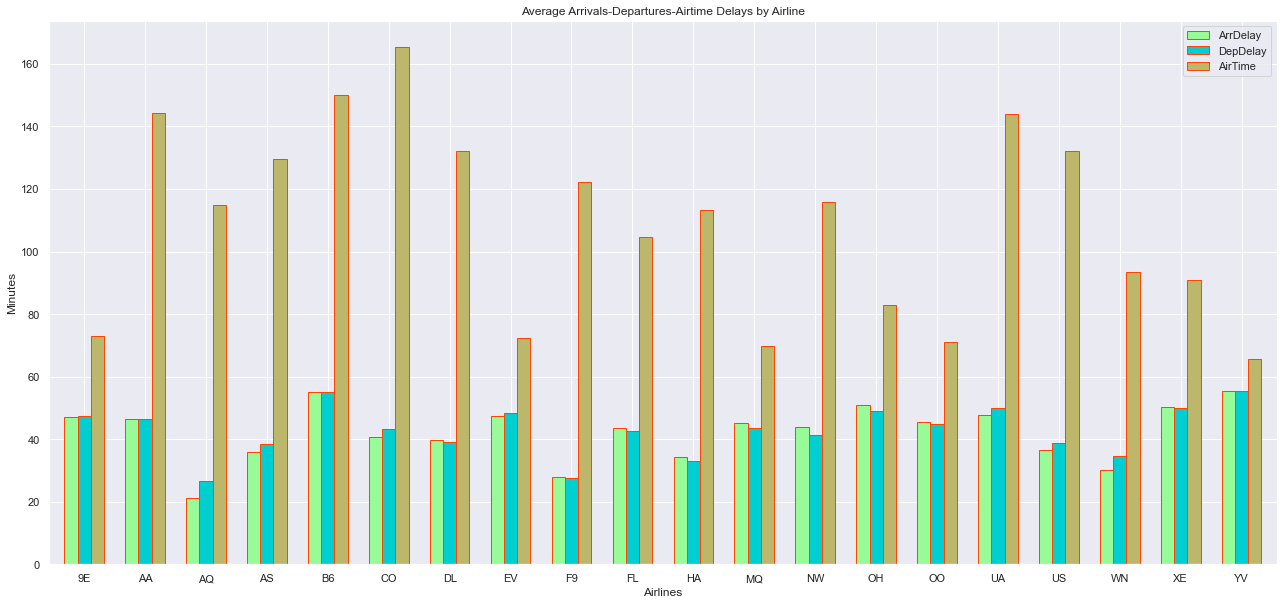

In [12]:

grouped = df[['UniqueCarrier', 'ArrDelay', 'DepDelay', 'AirTime']].groupby('UniqueCarrier').agg('mean') 
p = grouped.plot(kind='bar',color=['palegreen','darkturquoise','darkkhaki'],edgecolor='orangered',width=0.65, figsize=(22,10))
plt.ylabel("Minutes")
plt.xlabel("Airlines")
plt.xticks(rotation=0)
plt.title("Average Arrivals-Departures-Airtime Delays by Airline")
plt.show(p)



0    NaN
1    NaN
2    NaN
3    2.0
4    NaN
dtype: float64


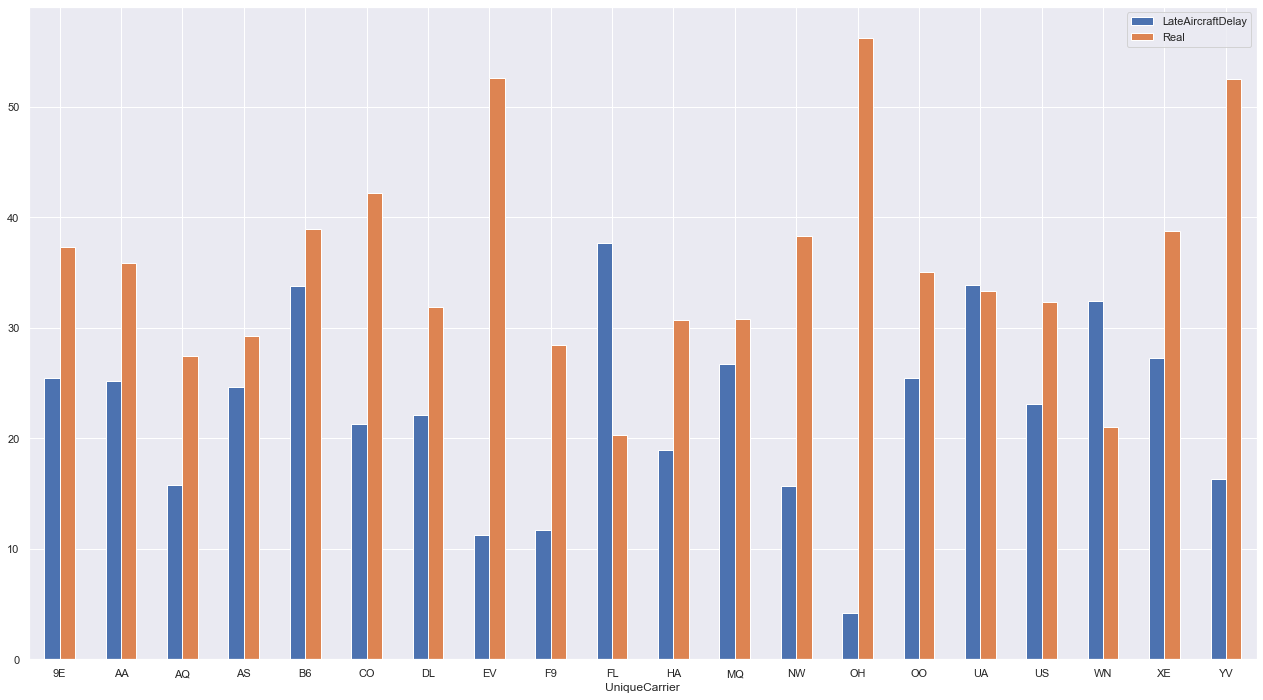

In [19]:
#ARA VE EL "HONEST DELAY"
#TEORICAMENT ERA NOMES RESTAR-LI EL LATEAIRCRAFT DELAY

real = df['DepDelay'] - df['LateAircraftDelay']
print(real.head())
df['Real'] = real
grouped = df[['UniqueCarrier', 'LateAircraftDelay','Real']].groupby('UniqueCarrier').agg('mean')
p = grouped.plot(kind='bar',
                 figsize=(22,12),
                )
plt.xticks(rotation = 0)
plt.show(p)

#pero no es del tot cert (SALTA A LA VISTA PER LA DIFERENCIA), perque en realitat si vull comprovar
#si eximeixo els retards de certs vols, no sembla just fer una mitja, ja que no tots els vols 
#tenen LateAircraftDelay, no? ...o si?


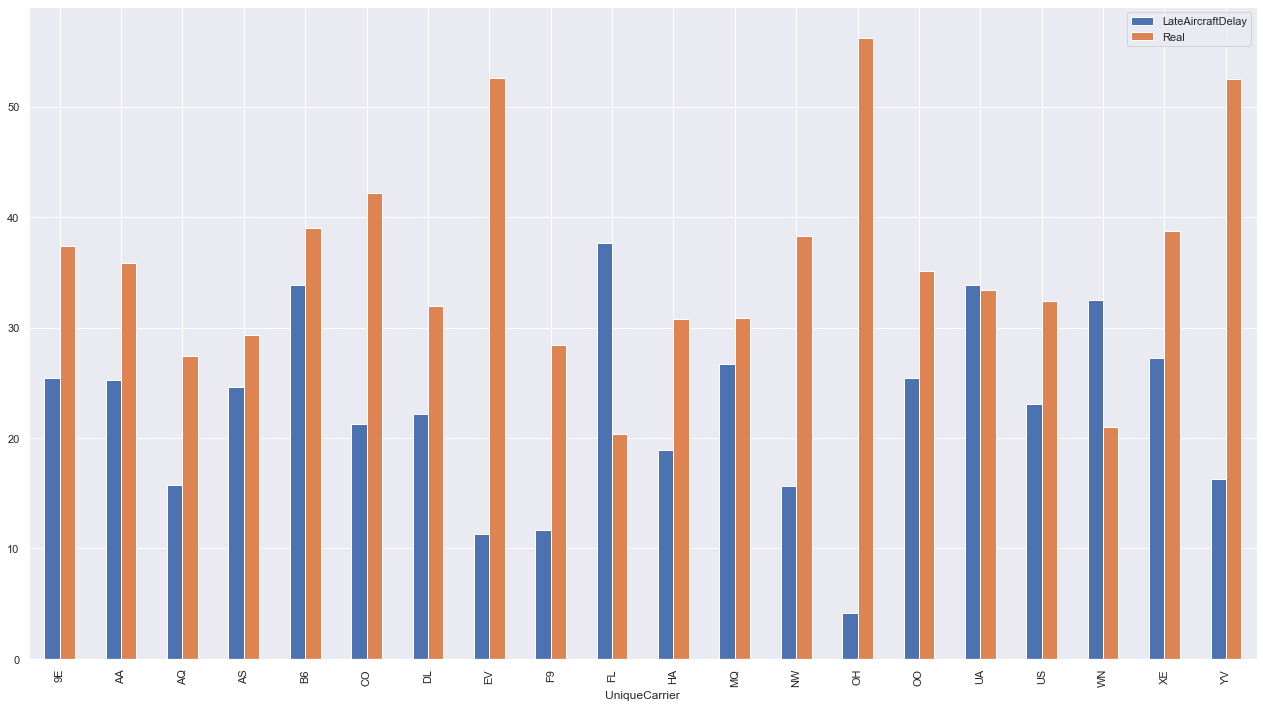

In [22]:
#per tant -----> necessito netejar-ho abans de fer el plot
#ERGO ESTEM PARLANT DE 2 PLOTS EXPRESSATS EN FREQUENCIA RELATIVA 
#1 - ARR/DEP PER COMPAÑIA (QUE JA EL TENIM, NOMES QUE HA DE SER EN PERCENTATGE) 
#    AQUEST INDICARA 
#2 - EL MATEIX PERO AMB ELS VOLS QUE TENEN LATEAIRCRAFTDELAY , LLAVORS JA QUE LATEAIRCRAFT I ARRIVAL DELAY
#HAURIEN DE SER SIMILARS NOMES TINC EN COMPTE DEPDELAY

df_2 = df.dropna(subset=['LateAircraftDelay'])
print(df_2.head())
print(df_2.describe())
grouped = df_2[['UniqueCarrier', 'LateAircraftDelay','Real']].groupby('UniqueCarrier').agg('mean')
p = grouped.plot(kind='bar',
                 figsize=(22,12),
                )
plt.show()

#PUES....NO SE RICK...ME PARECE QUE ESTA IDEA DEL DROPNA NO APORTA NADA A ESTE NIVEL , LES GRÀFIQUES 
#SON MASSA SEMBLANTS, SUPOSO QUE N'HAURIA DE CONSERVAR EL PERCENTATGE 